<a href="https://colab.research.google.com/github/SAGNIK890/NXP-Aim-Buggy/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import  img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!unzip -o archive\ \(1\).zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [8]:


base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [9]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [11]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


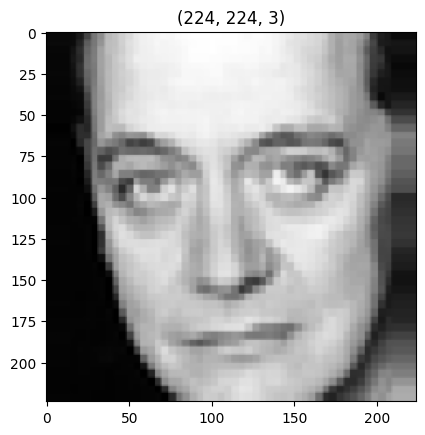

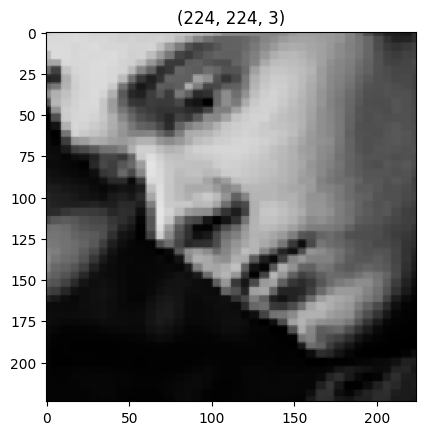

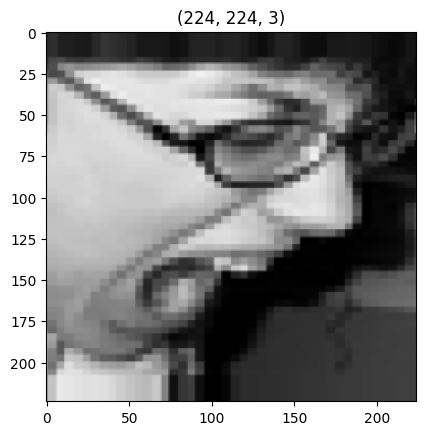

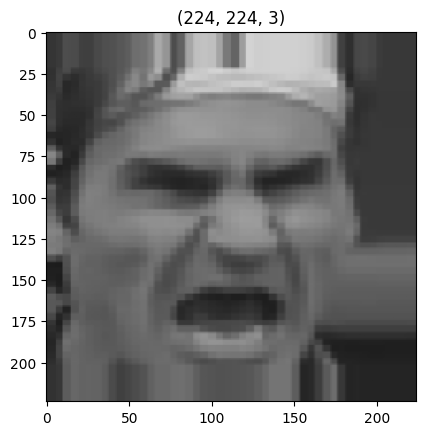

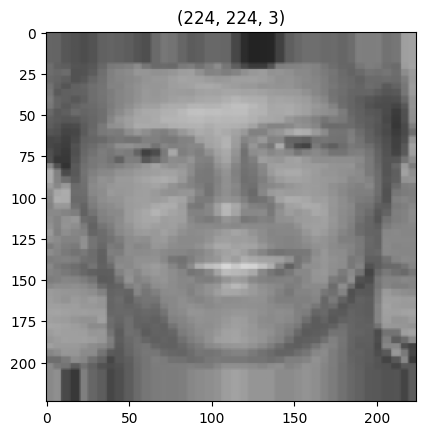

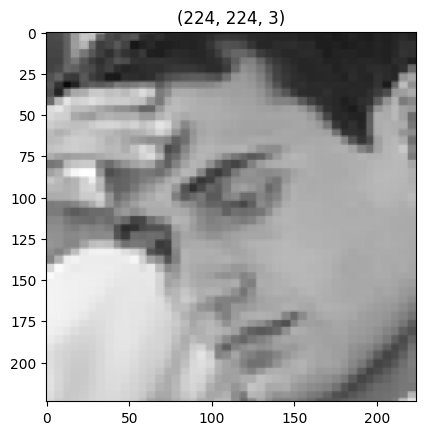

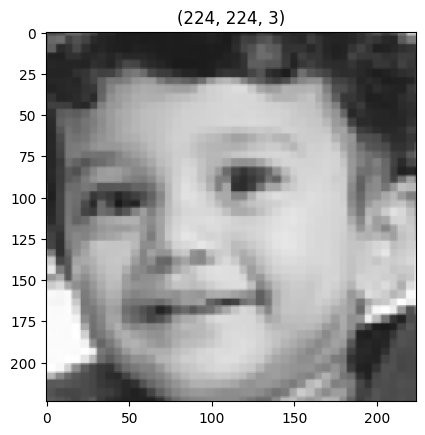

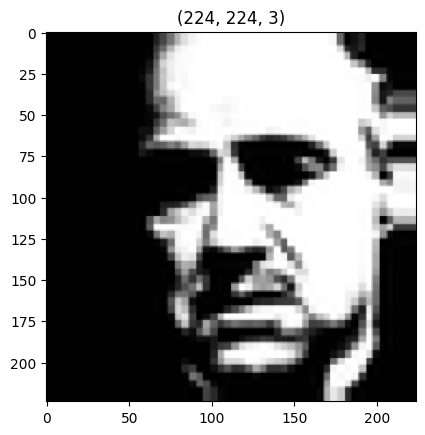

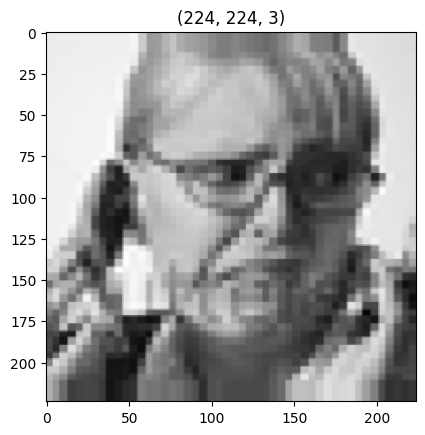

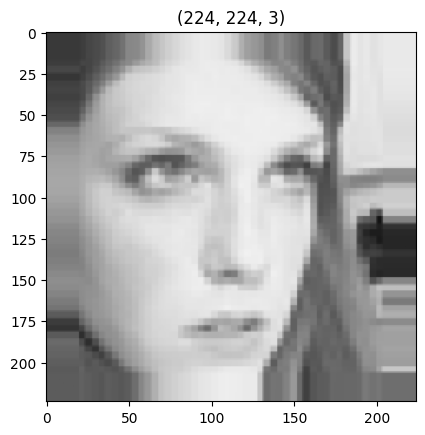

In [12]:



t_img, label = next(train_data)



def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break


plotImages(t_img, label)

In [13]:


from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [14]:
hist = model.fit(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1861 - loss: 14.5143
Epoch 1: val_accuracy improved from -inf to 0.30469, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.1888 - loss: 14.6994 - val_accuracy: 0.3047 - val_loss: 12.7264
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3233 - loss: 10.2522
Epoch 2: val_accuracy improved from 0.30469 to 0.44922, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3229 - loss: 10.1284 - val_accuracy: 0.4492 - val_loss: 5.3655
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2969 - loss: 8.0371
Epoch 3: val_accuracy did not improve from 0.44922
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.2954 - loss: 8.0492 - val_accuracy: 0.3008 - val_loss: 7.1548
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3884 - loss: 6.6280
Epoch 4: val_accuracy did not improve from 0.44922
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.3903 - loss: 6.5921 - val_accuracy: 0.3750 - val_loss: 5.3298
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3540 - loss: 6.1648
Epoch 5: val_accuracy improved from 0.44922 to 0.52734, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3567 - loss: 6.1425 - val_accuracy: 0.5273 - val_loss: 3.7053
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3897 - loss: 5.3108
Epoch 6: val_accuracy did not improve from 0.52734
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3893 - loss: 5.3098 - val_accuracy: 0.2812 - val_loss: 6.2661
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3431 - loss: 6.5128
Epoch 7: val_accuracy did not improve from 0.52734
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 8s/step - accuracy: 0.3474 - loss: 6.4531 - val_accuracy: 0.3477 - val_loss: 6.4304
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4275 - loss: 4.9444
Epoch 8: val_accuracy did not improve from 0.52734
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.4296 - loss: 4.9100 - val_accuracy: 0.3477 - val_loss: 5.9489
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3821 - loss: 5.3415
Epoch 9: val_accuracy did not improve from 0.52734
10/1

In [15]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [16]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

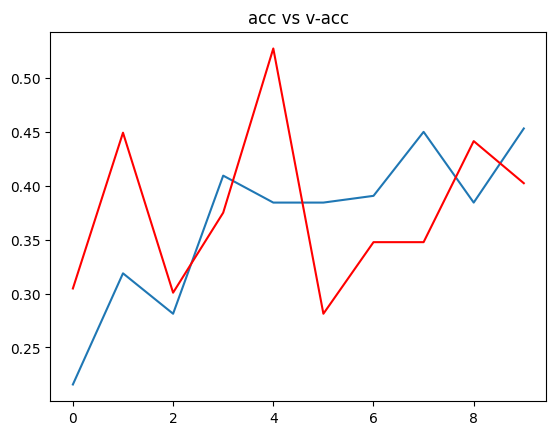

In [17]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

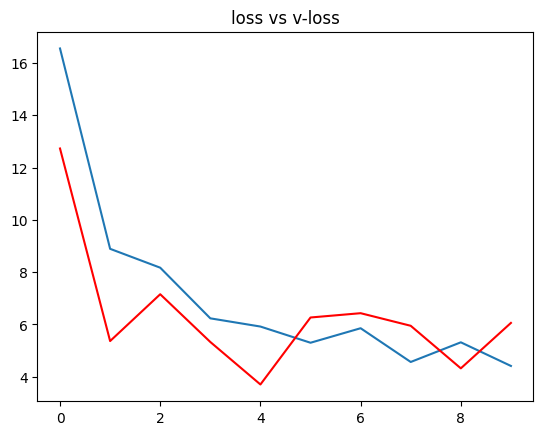

In [18]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [19]:

op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
 The image is of fearful


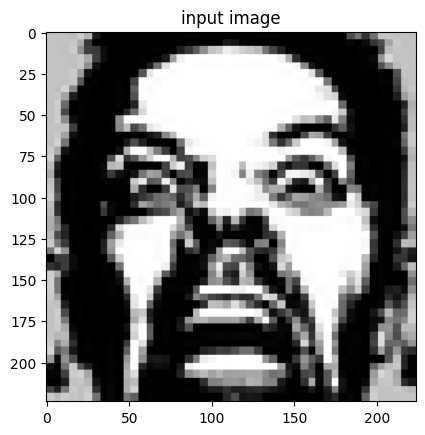

In [20]:
import random
import os


test_image_paths = []
for root, _, files in os.walk("/content/test"):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            test_image_paths.append(os.path.join(root, file))


if test_image_paths:
    path = random.choice(test_image_paths)
    img = load_img(path, target_size=(224,224) )

    i = img_to_array(img)/255
    input_arr = np.array([i])


    pred = np.argmax(model.predict(input_arr))

    print(f" The image is of {op[pred]}")


    plt.imshow(input_arr[0])
    plt.title("input image")
    plt.show()
else:
    print("No images found in the test directory.")